# Part II - Ford GoBike Data Explanation
## by (Tella Adetayo)

## Investigation Overview

I am trying to investigate what day of the week has the highest starting times per rides, what is/are the peak of the highest starting times for every rides, what gender took the most trips throughout the year, what are the top 10 station for starting trips and What is the average duration per minutes for every rides by user.


## Dataset Overview

Ford GoBike dataset have 174,952 rows after some wrangling and 19 columns. The columns are duration_sec and bike_id which the datatype is int64, start_time and end_time which both their datatype are in datetime, user_type, member_gender and bike_share_for_all_trips are in category while start_station_id, start_station_name, start_station_latitude,start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude are float64, the weekday_name is in object and the hour column is in int64.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
GoBike_df = pd.read_csv("Downloads/201902-fordgobike-tripdata.csv")

In [3]:
# Copy the dataset
GoBike_df_copy = GoBike_df.copy()

In [4]:
# Drop the null values
GoBike_df_copy.dropna(inplace = True)

In [5]:
# Change the datatypes of the columns to datetime and category
GoBike_df_copy["start_time"] = pd.to_datetime(GoBike_df_copy["start_time"])
GoBike_df_copy["end_time"] = pd.to_datetime(GoBike_df_copy["end_time"])
GoBike_df_copy["bike_share_for_all_trip"] = GoBike_df_copy["bike_share_for_all_trip"].astype("category")
GoBike_df_copy["member_gender"] = GoBike_df_copy["member_gender"].astype("category")
GoBike_df_copy["user_type"] = GoBike_df_copy["user_type"].astype("category")

In [6]:
# Extracting the weekday_name, hour and minutes from the start_time column
days_of_week = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday", 
    5: "Saturday",
    6: "Sunday"
}

GoBike_df_copy["weekday_name"] = GoBike_df_copy["start_time"].dt.weekday.map(days_of_week)

GoBike_df_copy["hour"] = GoBike_df_copy["start_time"].dt.hour
GoBike_df_copy["minutes"] = GoBike_df_copy["start_time"].dt.minute

## What day of the week has the highest starting time per rides?

Thursday is the day with the highest total number of trips followed by Tuesday and Friday which means there are more trips on a weekdays than on weekend.

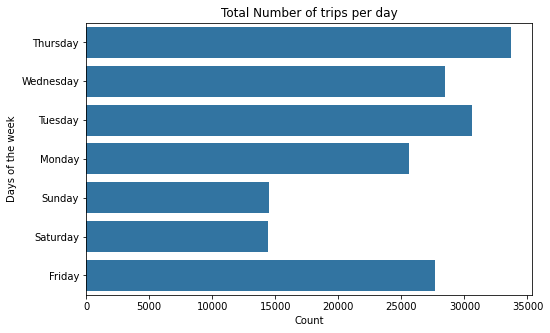

In [14]:
plt.figure(figsize=(8, 5))
base_color = sns.color_palette()[0]
sns.countplot(data = GoBike_df_copy, y = "weekday_name", color = base_color)
plt.ylabel("Days of the week")
plt.xlabel("Count")
plt.title("Total Number of trips per day");

## What is/are the peak of the starting time for every rides?

The data is bimodal which means there are two peaks in the dataset and the first occur arround 8am in the morning and the second peak occur around 17hrs(5pm) in the evening. The peaks signifys thats people took a lot of rides when leaving home around 8am and the second peak occur around 17hrs(5pm) when people are probably heading back home.

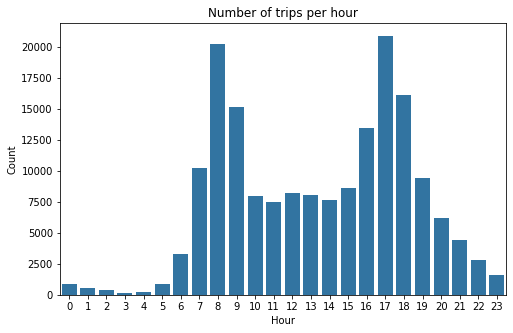

In [15]:
plt.figure(figsize = (8, 5))
base_color = sns.color_palette()[0]
sns.countplot(data = GoBike_df_copy, x = "hour", color = base_color)
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Number of trips per hour");

## What Gender took the most trips throughout the year?

There are there genders which are male, female and others. Male are the most common gender that took a trips which are 75% of the dataset followed by a Female which are 23% and there are Other which are the 2% of the dataset which are probably people that didn't specify their gender.

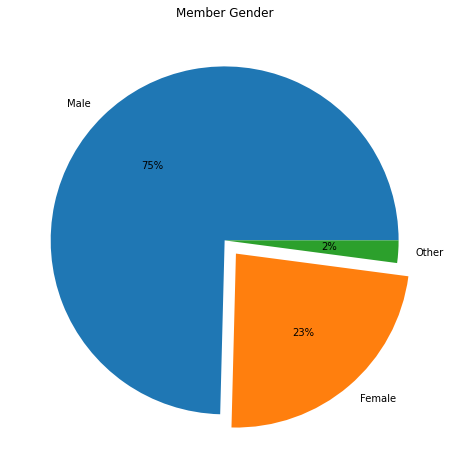

In [10]:
sorted_columns = GoBike_df_copy["member_gender"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sorted_columns, labels = sorted_columns.index, explode = (0, 0.1, 0), autopct = "%.0f%%")
plt.title("Member Gender")
plt.show();

## What are the top 10 station for starting trips?

Market Station is the most common place when rides are usually started and the least place where rides are usually started is Powell st BART Station.

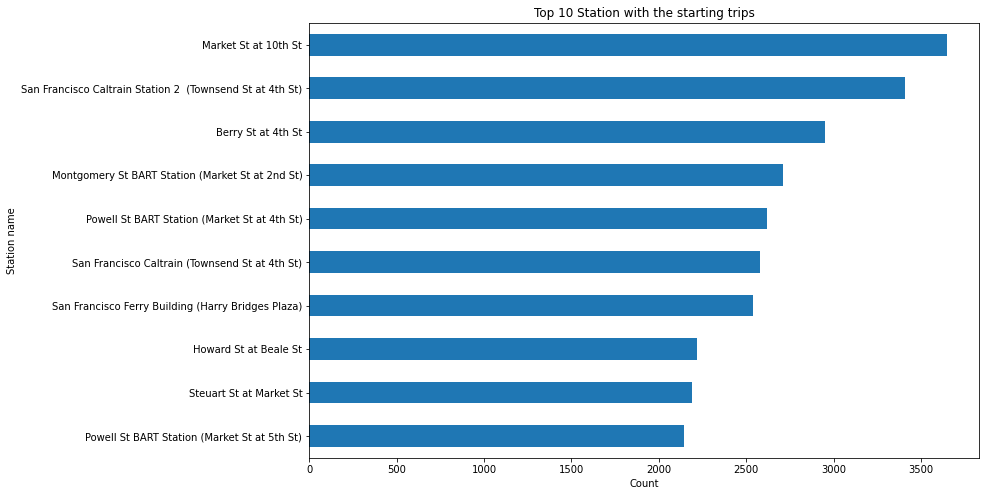

In [16]:
plt.figure(figsize = (12, 8))
base_color = sns.color_palette()[0]
top10_start_station = GoBike_df_copy["start_station_name"].value_counts()[:10].sort_values()
top10_start_station.plot(kind = "barh", color = base_color)
plt.xlabel("Count")
plt.ylabel("Station name")
plt.title("Top 10 Station with the starting trips");

## What is the average duration per minutes for every rides by user?

Customers are the user who spend a longer time on a trip than Subscriber even though the Subscribers are the most common user.

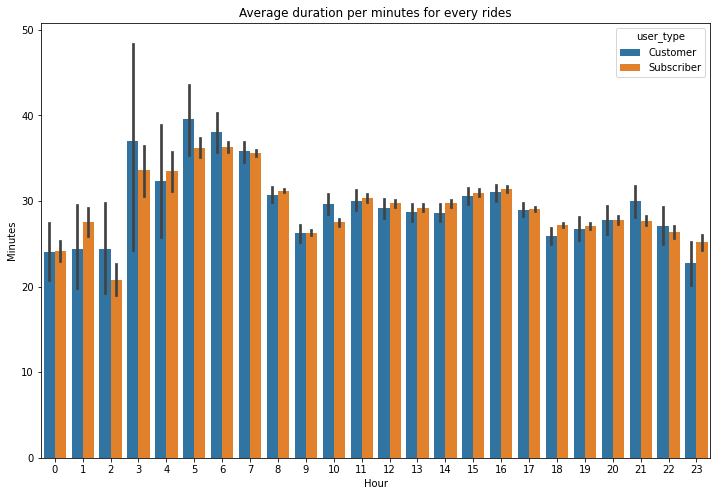

In [17]:
plt.figure(figsize = (12, 8))
sns.barplot(data = GoBike_df_copy, x = "hour", y = "minutes", hue = "user_type")
plt.xlabel("Hour")
plt.ylabel("Minutes")
plt.title("Average duration per minutes for every rides");